In [38]:
import pandas as pd
import numpy as np


In [39]:
df = pd.read_csv("WMT.csv")

In [40]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-10-16,45.250000,47.687500,45.187500,47.312500,31.065510,7098300
1,2000-10-17,47.562500,47.937500,45.687500,46.000000,30.203718,6268900
2,2000-10-18,45.937500,47.000000,44.875000,46.750000,30.696165,6148400
3,2000-10-19,46.562500,47.937500,46.125000,47.812500,31.393801,6302900
4,2000-10-20,46.875000,47.312500,46.062500,46.562500,30.573059,7153200
...,...,...,...,...,...,...,...
5780,2023-10-09,155.080002,155.850006,153.259995,155.839996,155.839996,7007500
5781,2023-10-10,156.229996,158.080002,155.660004,157.600006,157.600006,5338100
5782,2023-10-11,158.259995,159.490005,157.039993,158.229996,158.229996,4008700
5783,2023-10-12,158.529999,159.309998,157.770004,158.949997,158.949997,4504700


In [41]:
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year,month=month, day=day) #2023-10-13 을 3섹션으로 나눔

datetime_object = str_to_datetime('2023-10-13')#example
datetime_object

datetime.datetime(2023, 10, 13, 0, 0)

In [42]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2000-10-16
1      2000-10-17
2      2000-10-18
3      2000-10-19
4      2000-10-20
          ...    
5780   2023-10-09
5781   2023-10-10
5782   2023-10-11
5783   2023-10-12
5784   2023-10-13
Name: Date, Length: 5785, dtype: datetime64[ns]

In [43]:
df.index = df.pop('Date') # 밑의 plt과 오류 발생 후실행시



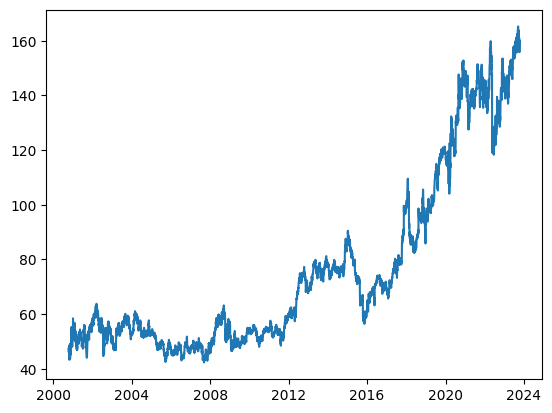

In [45]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [46]:
def df_to_windowed_df(dataframe, first_date_str,lsat_date_str,n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


SyntaxError: ignored